# Example 6.1 Systems with proportional and non-proportional damping



## Shear frame

The shear frame has a mass $m=1$ kg and stiffness $N=100$ N/m.

<center>
<img src="figures\shearframe.svg">
</center>


## Mass and stiffness


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import scipy
np.set_printoptions(precision=3)

# Define structural properties
m = 1.0 # Mass of each story
k = 100.0 # Stiffness

M = np.eye(2)*m # Mass matrix
K = np.array(([[2, -1], [-1, 1]]))*k # Stiffness matrix



We still use the equation of motion:
$$
\mathbf{M} \mathbf{\ddot{u}}(t) + 
\mathbf{C} \mathbf{\dot{u}}(t) + 
\mathbf{K} \mathbf{{u}}(t) =
\mathbf{f}(t)
$$

In this example, we will look at different types of damping models, and how they affect the calculation of damping ratios and mode shapes.

## Proportionally damped system

We will first assign a Rayleigh damping matrix:

$$\mathbf{C}=\alpha_1 \mathbf{K}+\alpha_2 \mathbf{M}$$

We solve the undamped eigenvalue problem, where only mass and stiffness are considered:

$$
\mathbf{M} \mathbf{\ddot{u}}(t) + 
\mathbf{K} \mathbf{{u}}(t) =
\mathbf{0}
$$

We assume that the homogenous solution of the differential equation is $ \mathbf{u} = \boldsymbol{\phi}e^{\lambda t}  $, which we further insert this solution into the equations to obtain the undamped eigenvalue problem:

$$\left( \lambda^2\mathbf{M}+\mathbf{K} \right)  \boldsymbol{\phi} = \mathbf{0}   $$


Here, it can be shown that the eigenvalues are purely imaginary, $\lambda=\pm i \omega_n$, where $\omega_n$ are the undamped natural frequencies. $ \boldsymbol{\phi}$ is the mode shape vector.

It will be shown below that we don't have to take the damping $\mathbf{C}$ into account in the eigenvalue problem when we have a Rayleigh damping matrix.



In [2]:
C = 0.4*M + 0.003*K # Rayleigh damping

lam,v = spla.eig(K,M) # Solve undamped eigenvalue problem using scipy 

mgen=v.T @ M @ v # Generalized masses (before normalization)

Phi=np.zeros_like(v)
for k in np.arange(2):
    Phi[:,k]=v[:,k]/np.sqrt(mgen[k,k]) # Mass normalize eigenvectors

omega_n = np.real(lam)**0.5 #Natural frequencies in rad/s

idx_sort=np.argsort(omega_n) # Find sorting order (smallest to biggest frequency)

omega_n=omega_n[idx_sort] # Rearrange frequencies
Phi=Phi[:,idx_sort] # Rearrange modes

print('Natural frequencies in rad/s:')
for p in omega_n:
     print('{:.3f}'.format(p))
    
print(' ')

print('Modes:')
for k in np.arange(2):
    print(' ')
    print('Vector ' + str(k+1) + ':')
    for n in np.arange(2):
        print( '{:.4f}'.format(Phi[n,k]) )


Natural frequencies in rad/s:
6.180
16.180
 
Modes:
 
Vector 1:
0.5257
0.8507
 
Vector 2:
0.8507
-0.5257


M_modal=
[[1. 0.]
 [0. 1.]]
 
C_modal=
[[5.146e-01 2.776e-17]
 [1.110e-16 1.185e+00]]
 
K_modal=
[[3.820e+01 1.421e-14]
 [0.000e+00 2.618e+02]]


Text(0.5, 0.92, 'Modal matrix')

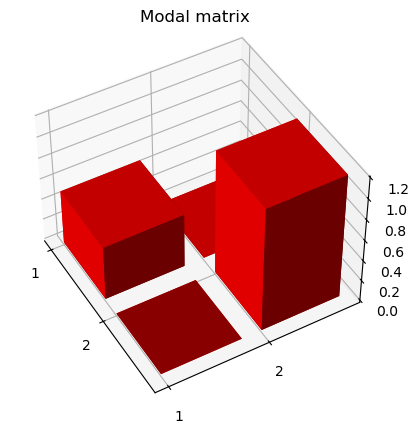

In [3]:
# Print modal matrices
print('M_modal=')
print(Phi.T @ M @ Phi)

print(' ')

print('C_modal=')
print(Phi.T @ C @ Phi)

print(' ')

print('K_modal=')
print(Phi.T @ K @ Phi)

# Plot M, K or C matrix
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

bar_height = np.matrix.flatten(Phi.T @ C @ Phi) # Select modal matrix to plot

# Plotting 3D bars
ax1.bar3d([1,2,1,2], [1,1,2,2], np.zeros(4), np.ones(4)*0.8, np.ones(4)*0.8, bar_height, color="red")
ax1.view_init(elev=45, azim=-30, roll=0)
ax1.xaxis.set_ticks([1,2])
ax1.yaxis.set_ticks([1,2])
plt.title('Modal matrix')

We know that the mode shape matrix from the (undamped) eigenvalue problem will make the modal mass and stiffness matrices diagonal:

$$\mathbf{\Phi}^\text{T} \mathbf{M} \mathbf{\Phi} = \tilde{\mathbf{M}}= \text{diag}(\tilde{m}_1,\tilde{m}_2,\dots)$$


$$\mathbf{\Phi}^\text{T} \mathbf{K} \mathbf{\Phi} = \tilde{\mathbf{K}}= \text{diag}(\tilde{k}_1,\tilde{k}_2,\dots)$$


In the case of Rayleigh damping, it is easy to show that the modal damping matrix will also be diagonal:

$$\tilde{\mathbf{C}} = \mathbf{\Phi}^\text{T} \mathbf{C} \mathbf{\Phi} =
\mathbf{\Phi}^\text{T} (\alpha_1 \mathbf{K}+\alpha_2 \mathbf{M}) \mathbf{\Phi} =
\alpha_1  \tilde{\mathbf{M}}
+ 
\alpha_2  \tilde{\mathbf{K}}
$$

The Rayleigh damping is therefore an example of *proportional damping* or *classical damping*. The modes obtained from the undamped eigenvalue problem therefore fully uncouples the equations of motion. 


Structural damping is something we rarely directly control as engineers. What if the system does not have proportional damping? This will be explored in the following.


## Animation of mode shapes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Use this line for inline animations in Jupyter notebook
# If you want interactive animations, use %matplotlib notebook instead
%matplotlib inline  

idx_plot=1

mode_plot=Phi[:,idx_plot]
lam_plot=1j*omega_n[idx_plot]

mode_plot=mode_plot/np.max(np.abs(mode_plot))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Plot setup
ax.set_ylabel('Floor')
ax.set_xlabel('Modal deflection')
ax.grid(True)
ax.set_xlim(-3, 3)  # X-limits based on expected deflection
ax.set_ylim(0, 3)   # Y-limits based on number of floors (3 floors in this case)
line_objects = [ax.plot([], [], marker='o')[0]]

# Number of cycles
n_cyc=5

# Animation function
def animate(frame):
    t = frame  # Time step, controls how fast it swings
    # Extract real and imaginary parts
    data_plot = np.append(0, np.real(mode_plot* np.exp(lam_plot*t)))  # Multiply by e^(lambda*t) to simulate time-varying
    line_objects[0].set_data(data_plot, [0, 1, 2])  # Update the plot for each mode
    return line_objects

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.linspace(0, 2*np.pi/abs(lam_plot)*n_cyc,200), interval=200, blit=True)

# Close the static figure to prevent double output
plt.close(fig)

# Display the animation in the notebook
HTML(ani.to_jshtml())

## Non-proportional damping

We osberved that the modal $\mathbf{M}$ and $\mathbf{K}$ matrices are diagonal, but the damping is not. This is because we have not included $\mathbf{C}$ in the eigenvalue problem. 

We want to calculate the damping ratios of the structure, and we can not neglect the damping when solving the eigenvalue problem. We still assume that the homogenous solution of the differential equation has the following form:

$$ \mathbf{u} = \boldsymbol{\phi}e^{\lambda t}  $$

We further insert this solution into the differential equation to obtain the *quadratic eigenvalue problem* or *damped eigenvalue problem*:

$$\left( \lambda^2\mathbf{M} + \lambda \mathbf{C} +\mathbf{K} \right)\boldsymbol{\phi} = \mathbf{0}   $$

The eigenvalues come in complex conjugate pairs $\lambda = a \pm ib$, and the corresponding eigenvectors also come in complex conjugate pairs. This is to ensure that the sum of the imaginary parts is zero such that the dynamic response is real. The response associated with one of the eigenvalues and eigenvectors is

$$ \mathbf{u} = \boldsymbol{\phi} e^{\lambda t} = \boldsymbol{\phi} e^{at}\left( \cos (bt) + i \sin(bt) \right)  $$

This corresponds to the free vibration response of a damped single degree of freedom system:

$$ u(t) = e^{-\zeta \omega_n t}\left( C_1\cos (\omega_D t) + C_2 \sin(\omega_D t) \right)  $$


The eigenvalue can thus be defined as 

$$\lambda = -\xi \omega_n \pm i \omega_D=-\xi \omega_n \pm i \omega_n\sqrt{1-\xi^2}$$

The undamped natural frequency can thus be obtained as 

$$\omega_n = |\lambda|$$

and the daping ratio is minus the real part divided by the absolute value of the eigenvalue:

$$\xi = -\Re(\lambda)/ |\lambda| $$

It is convenient to avoid solving the quadratic eigenvalue problem by transforming the system of second-order differential equations to a system of first-order differential equations. This is often referred to as transforming the system to state-space. Note that there are no approximations involved in this transform.

$$ \ddot{\mathbf{u}} + \mathbf{M}^{-1} \mathbf{C} \dot{\mathbf{u}} +\mathbf{M}^{-1} \mathbf{K} \mathbf{u} = \mathbf{M}^{-1}  \mathbf{f}(t)    $$

$$ \left[ \begin{array}{c} \dot{\mathbf{u}}\\ \ddot{\mathbf{u}} \end{array} \right] 
+ \left[ \begin{array}{c} \mathbf{0}& -\mathbf{I} \\ \mathbf{M}^{-1} \mathbf{K} & \mathbf{M}^{-1} \mathbf{C} \end{array} \right] 
\left[ \begin{array}{c} \mathbf{u}\\ \dot{\mathbf{u}} \end{array} \right] 
= \left[ \begin{array}{c} \mathbf{0}\\ \mathbf{M}^{-1}  \end{array} \right]   \mathbf{f}(t) $$

The system can then be represented by the state vector $\mathbf{x}=\left[ \begin {array}{cc} \mathbf{u} & \dot{\mathbf{u}} \end{array}\right]^\text{T}$ and the system of first order differential equations reads

$$ \dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{f}(t)   $$

$$\mathbf{A} = \left[ {\begin{array}{c} {\mathbf{0}}&{\mathbf{I}}\\ {-\mathbf{M}^{-1} \mathbf{K}}&{-\mathbf{M}^{-1} \mathbf{C}} \end{array}} \right]  
,
\quad
\mathbf{B} = \left[ \begin{array}{c} \mathbf{0} \\ \mathbf{M}^{-1} \end{array} \right]   $$

Assuming once again that the solution is on the form 

$$ \mathbf{u} = \boldsymbol{\phi} e^{\lambda t}  $$

The eigenvalue problem reads

$$
\mathbf{A} \boldsymbol{\psi}
= \lambda \boldsymbol{\psi}
$$

where the eigenvector $ \boldsymbol{\psi}$ contains the mode shape vector $\boldsymbol{\phi}$ and  $\lambda \boldsymbol{\phi}$:

$$
 \boldsymbol{\psi} = \left[ \begin{array}{c} 
\boldsymbol{\phi} \\
\lambda \boldsymbol{\phi}
\end{array} \right]
$$


In [5]:

# Damping matrix (which is not proportional)
C = np.array([
    [0.15,-2],
    [-2,3]
])

# State-space A-matrix
A = np.block([
    [np.zeros_like(M), np.eye(M.shape[0])],
    [-np.linalg.inv(M) @ K, -np.linalg.inv(M) @ C]
])

# Solve the eigenvalue problem of A-matrix
lamb,psi=spla.eig(A)

idx_sort=np.argsort(np.abs(lamb)) # Find sorting order (smallest to biggest frequency)

lamb=lamb[idx_sort] # Rearrange frequencies
psi=psi[:,idx_sort] # Rearrange eigenvectors

psi=psi*100 # Scale to make numbers more convenient (eigenvectors are always scalable)

omega_n_ss=np.abs(lamb)
xi_ss=-np.real(lamb)/np.abs(lamb)

print('Eigenvalues from state matrix:')
for p in lamb:
     print('{:.3f}'.format(p))
 
print(' ')
   
print('Natural frequencies in rad/s:')
for p in omega_n_ss:
     print('{:.3f}'.format(p))

print(' ')
    
print('Damping ratios in %:')
for p in xi_ss:
     print('{:.3f}'.format(p*100))

print(' ')

print('Modes:')
for k in np.arange(4):
    print(' ')
    print('Vector ' + str(k+1) + ':')
    for n in np.arange(2):
        print( '{:.4f}'.format(psi[n,k]) )

Eigenvalues from state matrix:
-0.212-6.243j
-0.212+6.243j
-1.363-15.950j
-1.363+15.950j
 
Natural frequencies in rad/s:
6.247
6.247
16.009
16.009
 
Damping ratios in %:
3.393
3.393
8.515
8.515
 
Modes:
 
Vector 1:
0.8465+8.3170j
-0.4552+13.4080j
 
Vector 2:
0.8465-8.3170j
-0.4552-13.4080j
 
Vector 3:
-0.4444+5.2005j
-0.8750-3.2955j
 
Vector 4:
-0.4444-5.2005j
-0.8750+3.2955j


In [6]:
print('C_modal=')
print(Phi.T @ C @ Phi)

# Plot M, K or C matrix
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

bar_height = np.matrix.flatten(Phi.T @ C @ Phi) # Select modal matrix to plot

# Plotting 3D bars
ax1.bar3d([1,2,1,2], [1,1,2,2], np.zeros(4), np.ones(4)*0.8, np.ones(4)*0.8, bar_height, color="red")
ax1.view_init(elev=30, azim=-50, roll=0)
ax1.xaxis.set_ticks([1,2])
ax1.yaxis.set_ticks([1,2])
plt.title('Modal matrix')

C_modal=
[[ 0.423 -2.169]
 [-2.169  2.727]]


Text(0.5, 0.92, 'Modal matrix')

## Animation of complex mode shapes


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Use this line for inline animations in Jupyter notebook
# If you want interactive animations, use %matplotlib notebook instead
%matplotlib inline  

idx_plot=0

mode_plot=psi[0:2,idx_plot]
#lam_plot=lamb[idx_plot]
lam_plot=np.imag(lamb[idx_plot])*1j

mode_plot=mode_plot/np.max(np.abs(mode_plot))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5,3))

# Plot setup
ax.set_ylabel('Floor')
ax.set_xlabel('Modal deflection')
ax.grid(True)
ax.set_xlim(-3, 3)  # X-limits based on expected deflection
ax.set_ylim(0, 3)   # Y-limits based on number of floors (3 floors in this case)
line_objects = [ax.plot([], [], marker='o')[0]]
line_objects2 = [ax.plot([], [], marker='x')[0]]

# Number of cycles
n_cyc=5

# Animation function
def animate(frame):
    t = frame  # Time step, controls how fast it swings
    # Extract real and imaginary parts
    data_plot = np.append(0, np.real(mode_plot* np.exp(lam_plot*t)))  # Multiply by e^(lambda*t) to simulate time-varying
    #data_plot2 = np.append(0, (np.real(mode_plot)*np.cos(np.imag(lam_plot)*t)  - np.imag(mode_plot)* np.sin(np.imag(lam_plot)*t))*np.exp(np.real(lam_plot)*t*0)    )  # Multiply by e^(lambda*t) to simulate time-varying
    line_objects[0].set_data(data_plot, [0, 1, 2])  # Update the plot for each mode
    #line_objects2[0].set_data(data_plot2, [0, 1, 2])  # Update the plot for each mode
    return line_objects

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.linspace(0, 2*np.pi/abs(lam_plot)*n_cyc,200), interval=100, blit=True)

# Close the static figure to prevent double output
plt.close(fig)

# Display the animation in the notebook
HTML(ani.to_jshtml())